<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/FinalProject_Classification_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FinalProject_Classification
# Adam Winders
# CS-430-ON
# Machine Learning in the Cloud
<br>

### Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Imports for specific models
Imports SVC and SVR 

In [4]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

### Imports for Splitting Data and Building Pipeline


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

### Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

### Line Plots

Plots straight line on a plot

In [9]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

Draws the plot margins similar to the book

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Logistic Regression

## Reading the Data

In [11]:
url = 'https://raw.githubusercontent.com/a-winders/MLA_ATW/main/stroke_data.csv'
df = pd.read_csv(url)

## Statistical and Visual Exploration

Summarizes nummerical columns of data

In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Displays number of confirmed strokes vs. non-strokes

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke_confirm= df['stroke'].groupby(df['stroke']).count()

In [ ]:
stroke_confirm

stroke
0    4861
1     249
Name: stroke, dtype: int64

Bar plot

<Axes: title={'center': 'Stroke vs. Non-stroke'}, xlabel='stroke'>

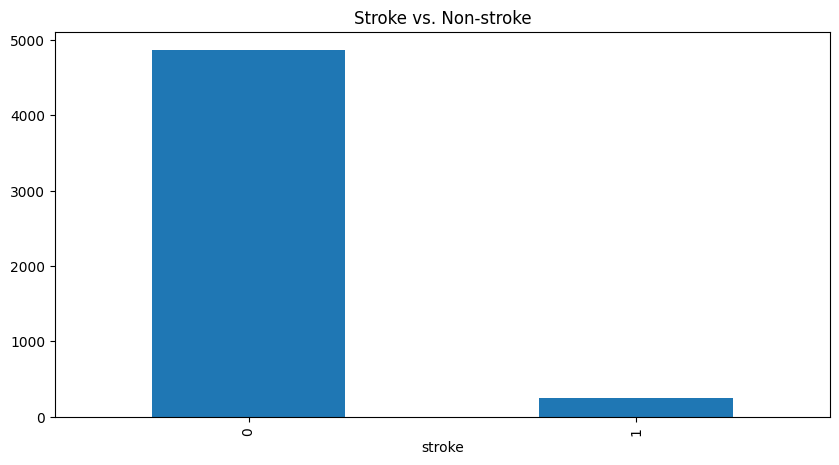

In [ ]:
stroke_confirm.plot(kind='bar', figsize=(10,5), title='Stroke vs. Non-stroke')

Scatter plot

<Axes: title={'center': 'Housing and BMI'}, xlabel='Residence type', ylabel='BMI'>

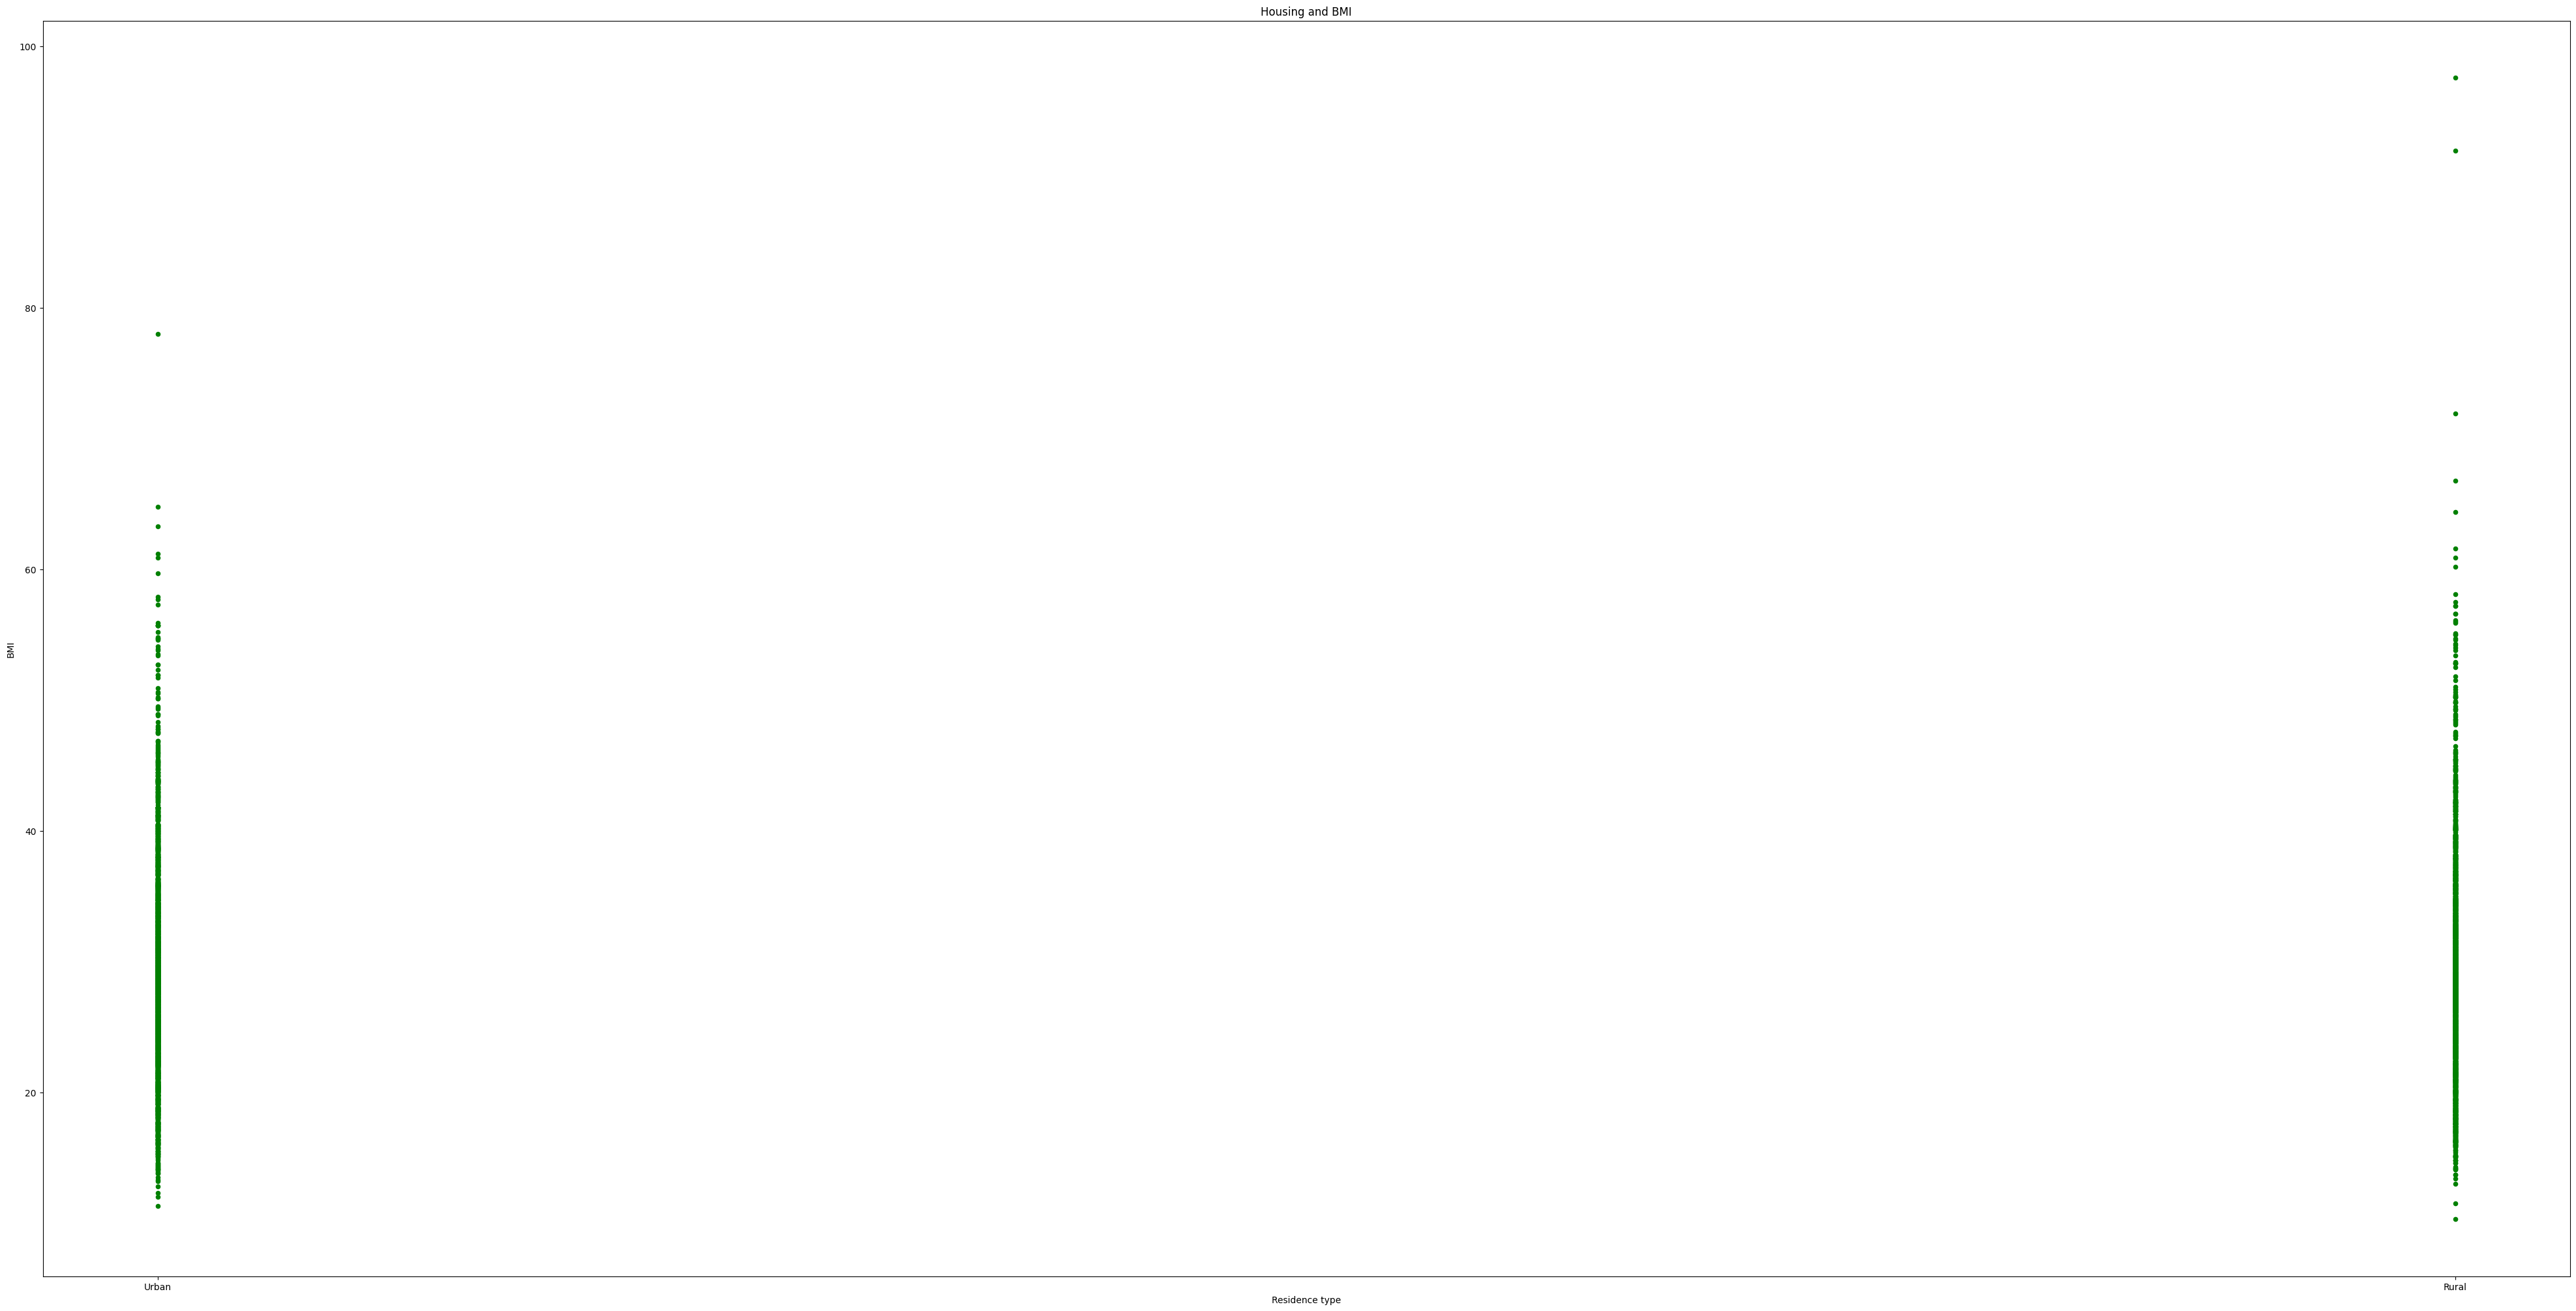

In [ ]:
df.plot(kind='scatter',x='Residence_type',xlabel='Residence type',y='bmi',ylabel='BMI',c = 'green',title="Housing and BMI",figsize=(50,25))

Pairplot

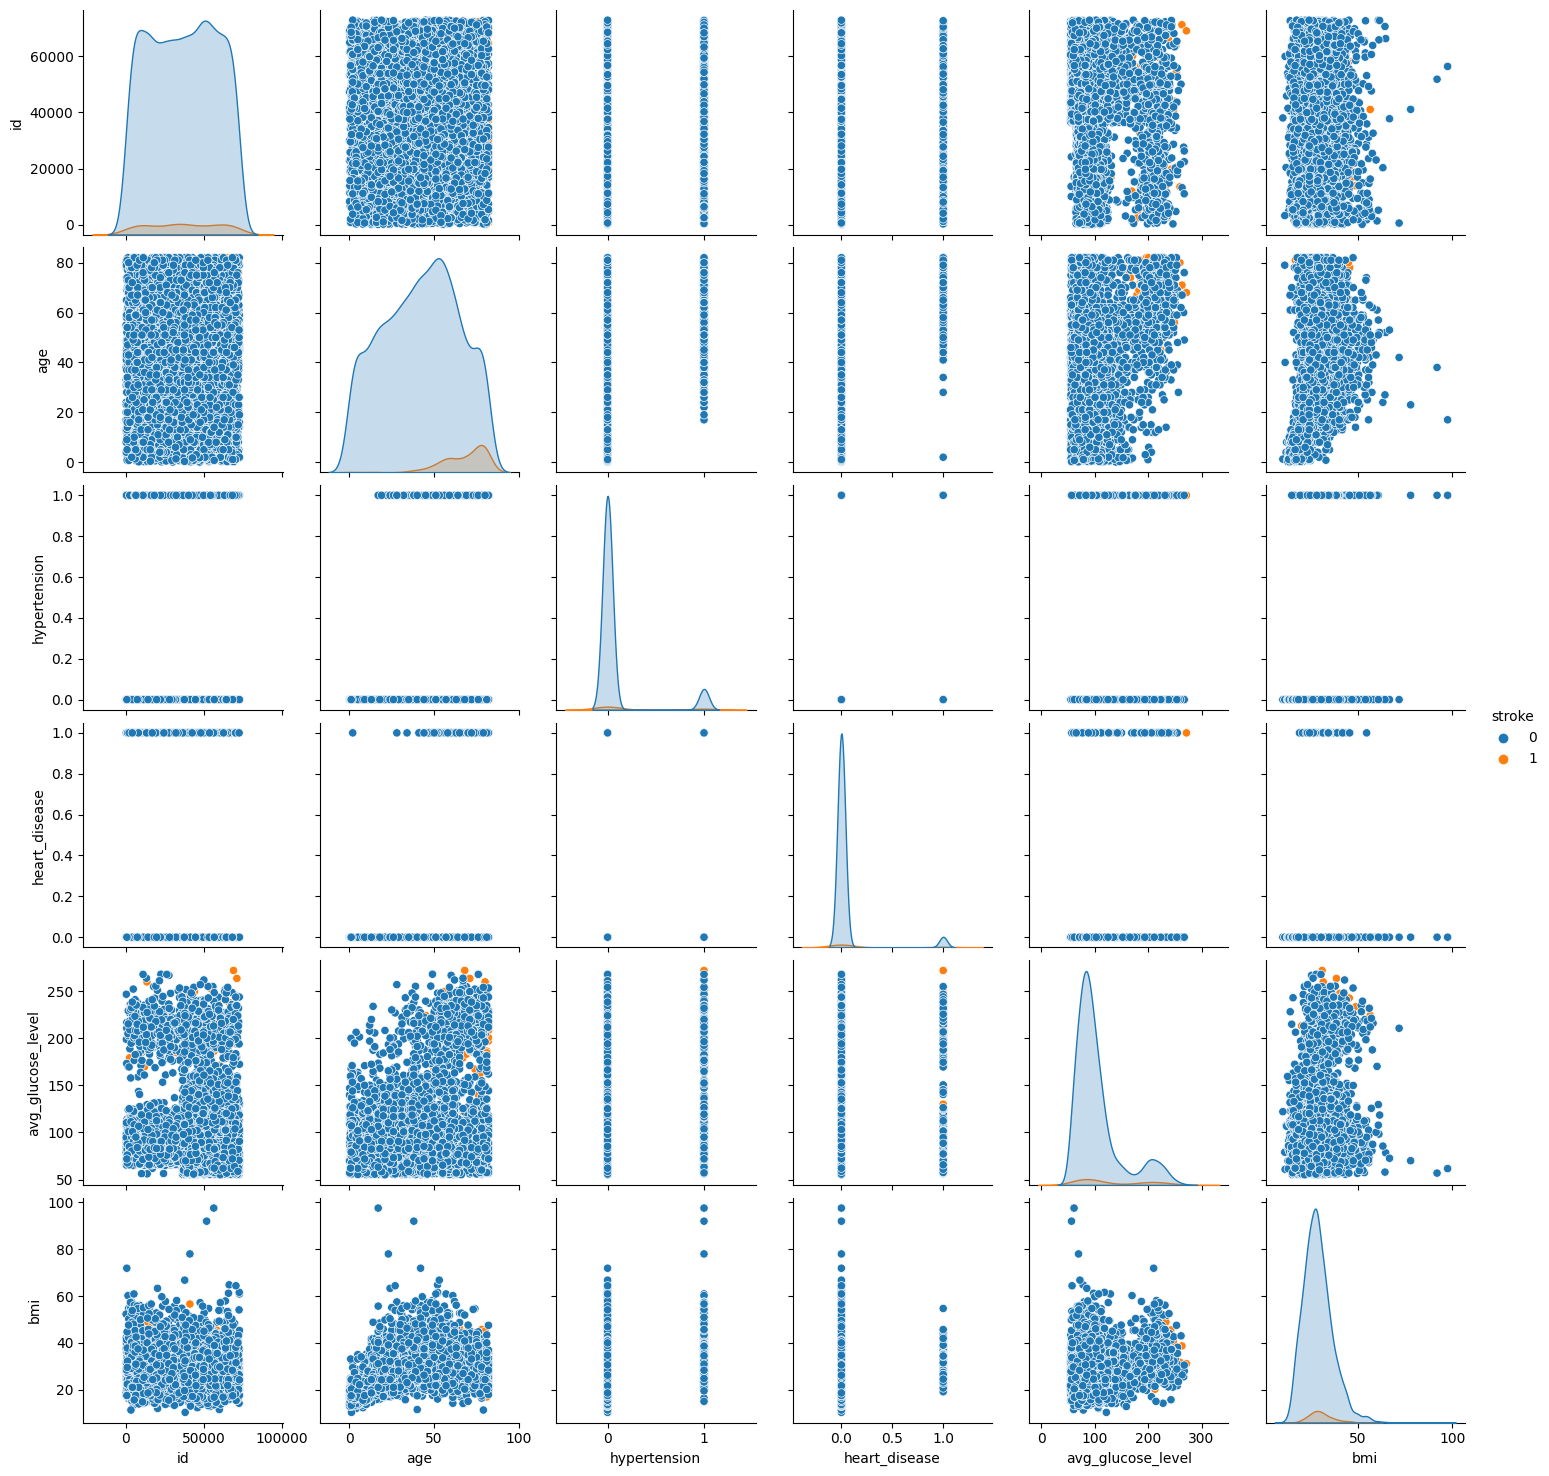

In [ ]:
plotDF = df[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
sns.pairplot(data=plotDF, diag_kind='kde', hue='stroke')

Line plot

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

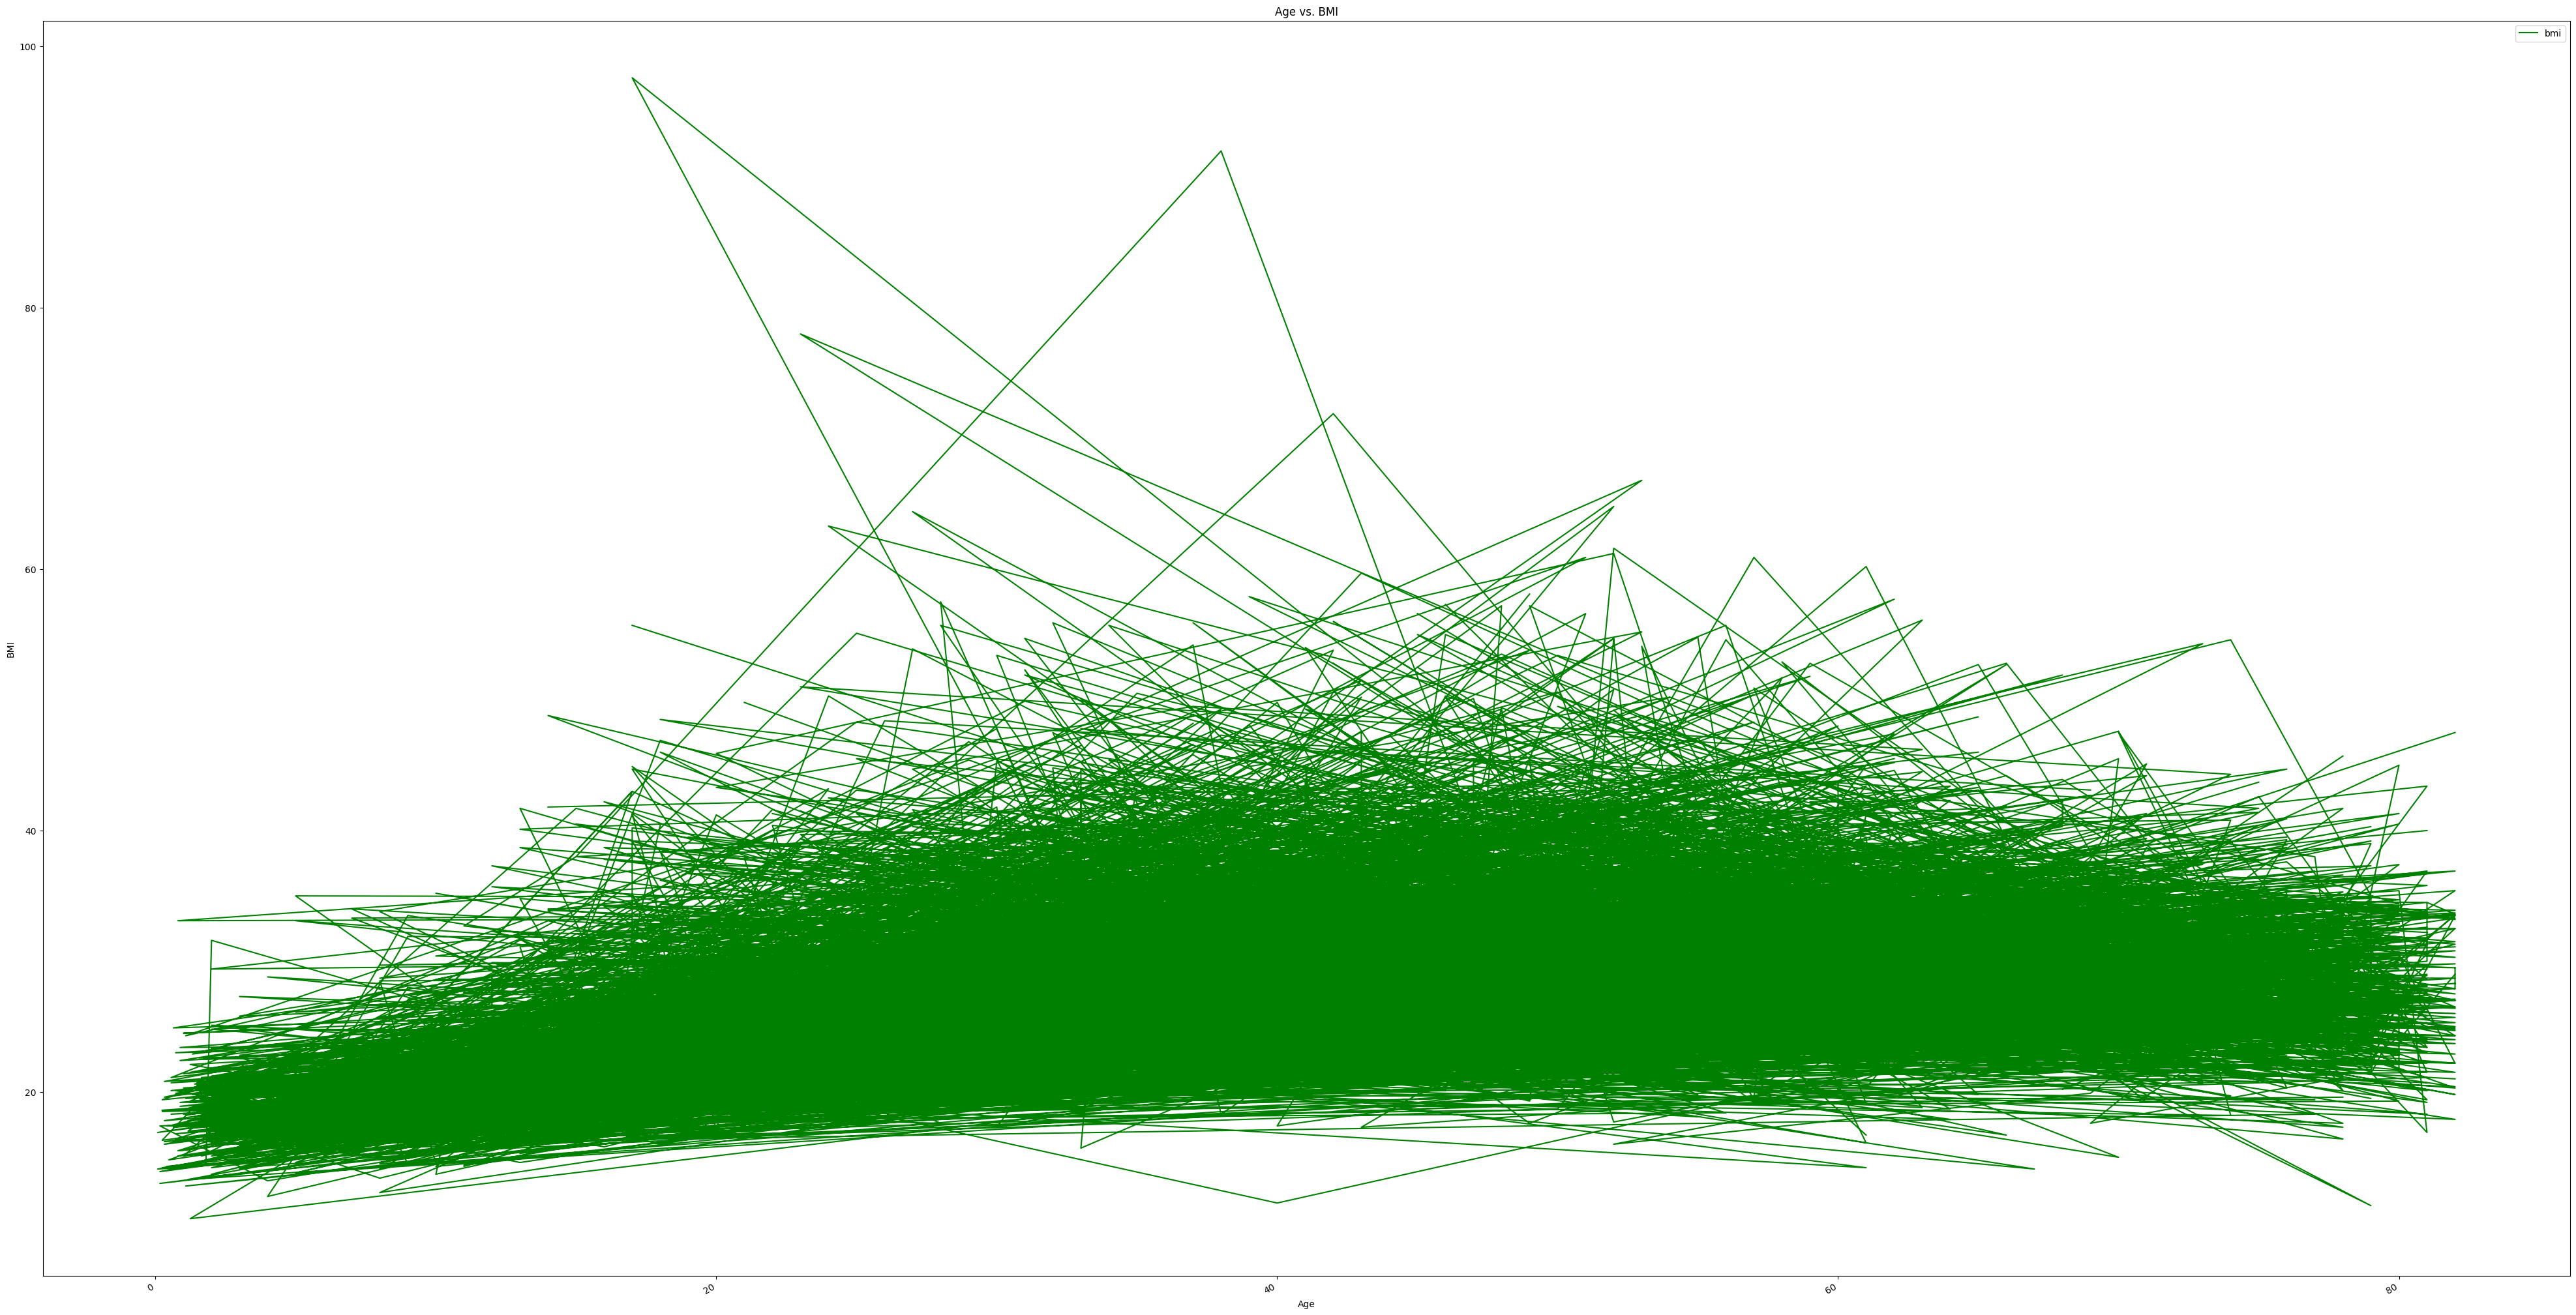

In [ ]:
df.plot(x='age',xlabel='Age',y='bmi',ylabel='BMI',c = 'green',title="Age vs. BMI",figsize=(50,25))
plt.xticks(rotation=30, ha='right')

Box plot

<Axes: >

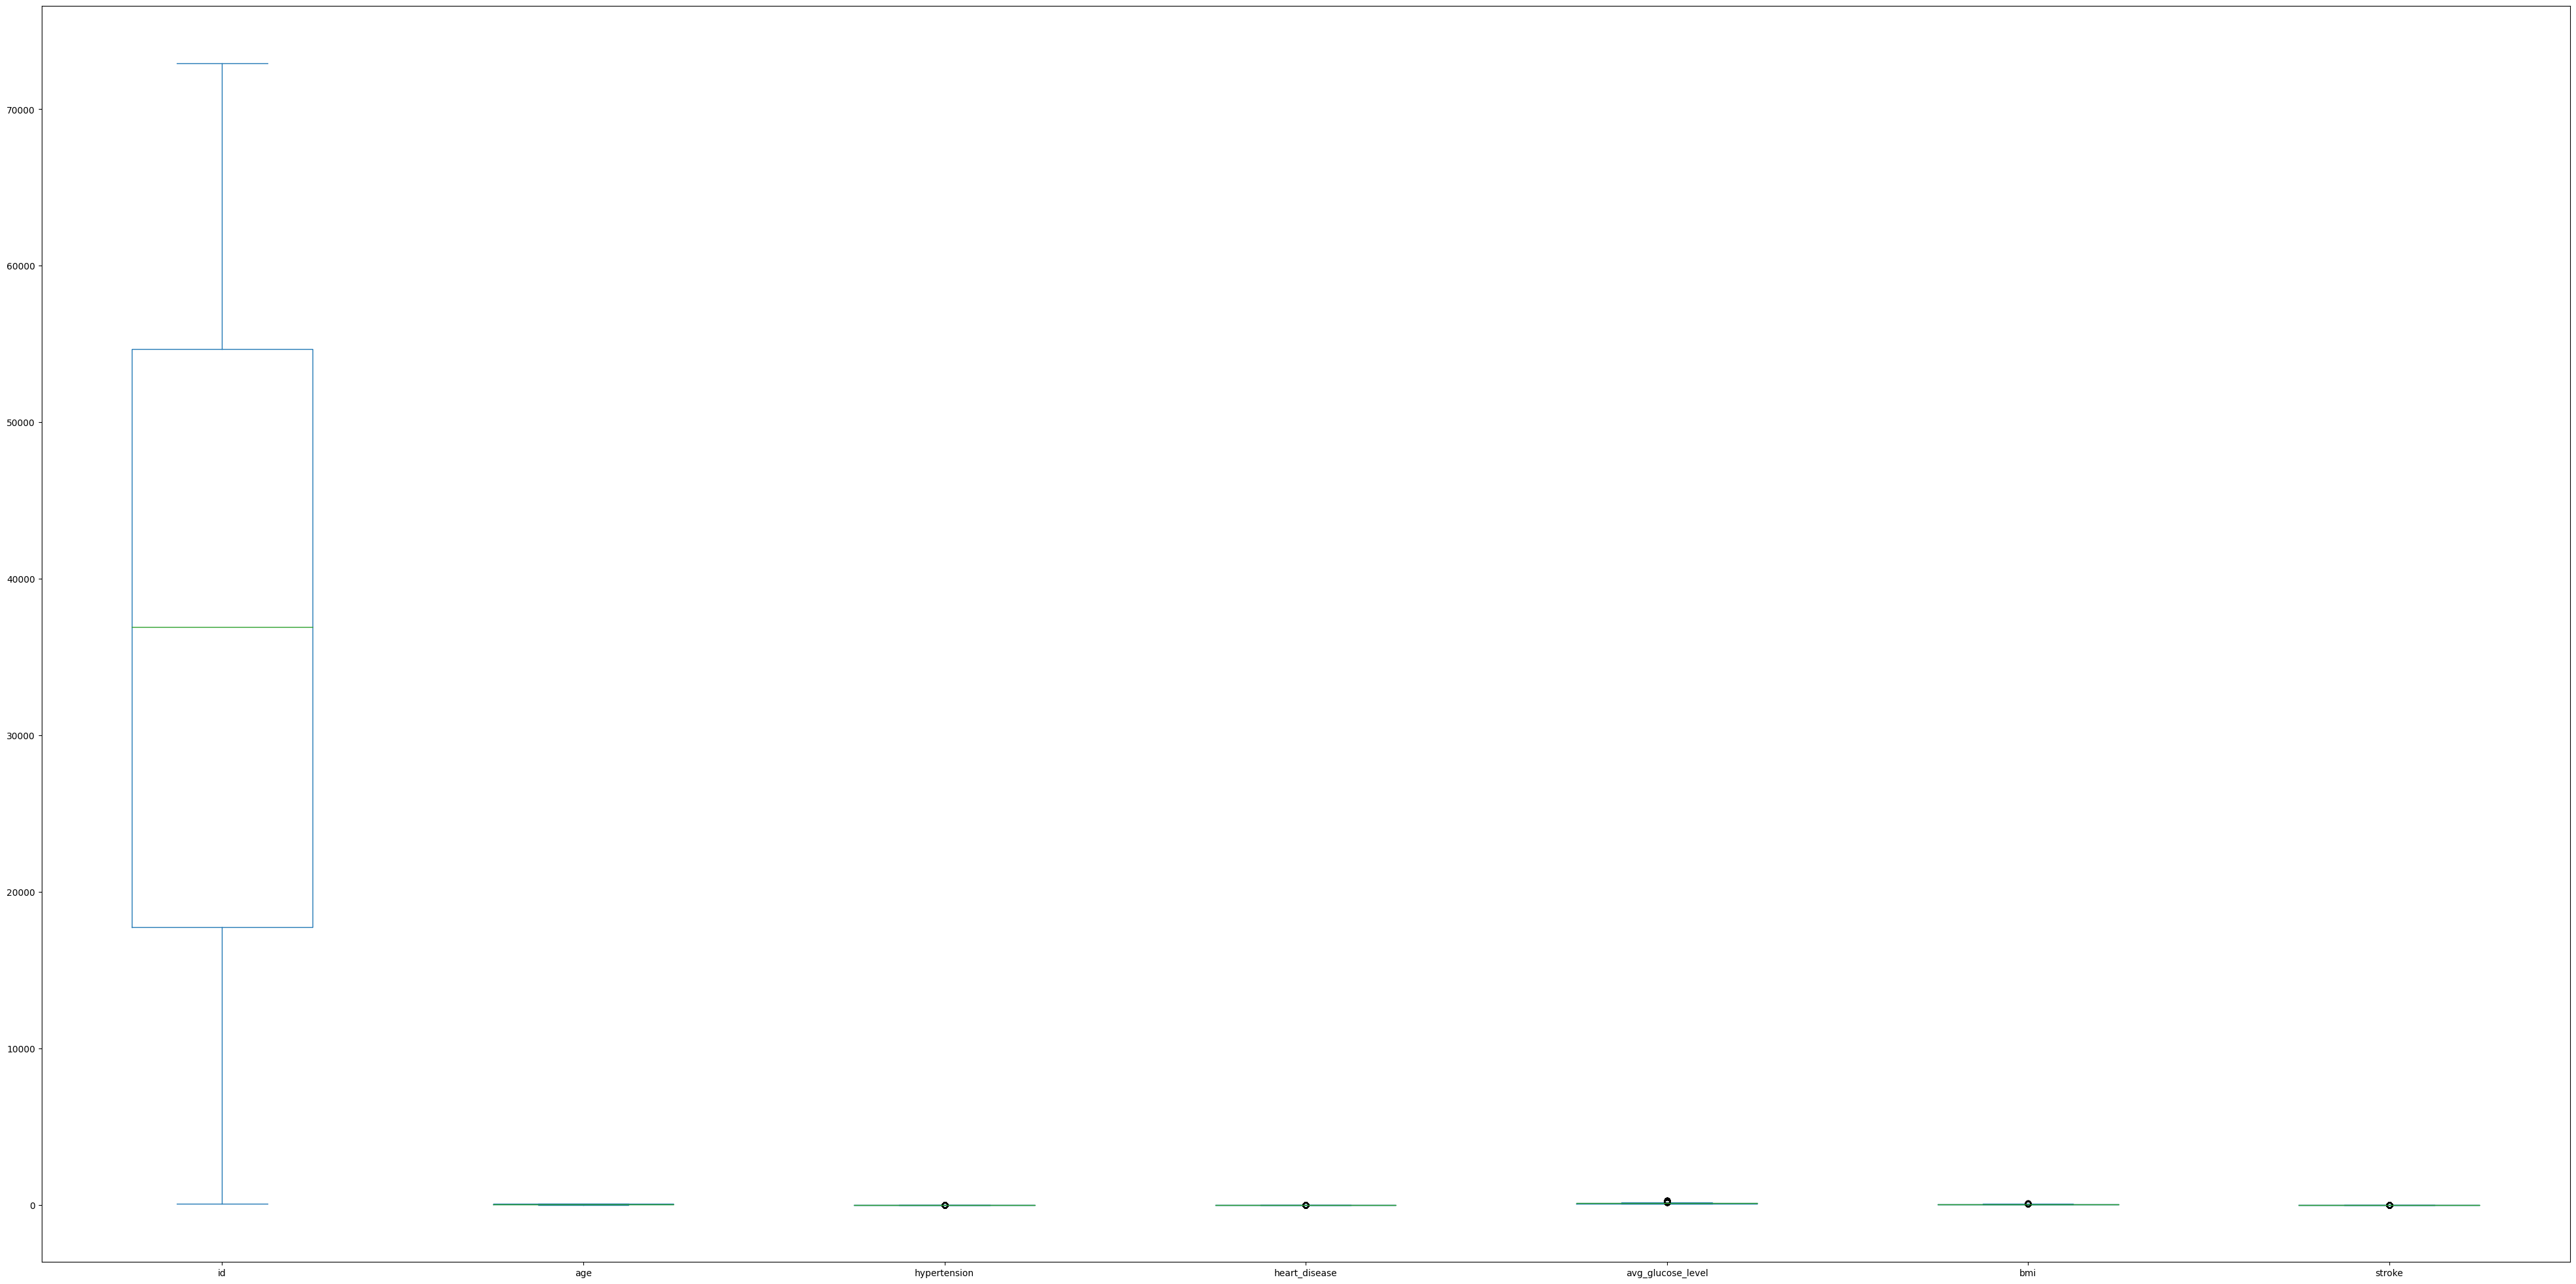

In [ ]:
df.plot(kind='box', figsize=(50,25))

Heat map

<ipython-input-261-66e8dc138da1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=df.corr()


<Axes: >

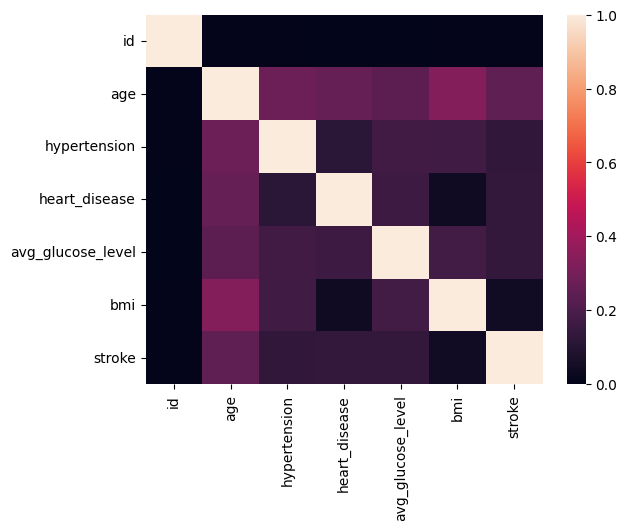

In [ ]:
corr_data=df.corr()
corr_data
sns.heatmap(corr_data)

## Splitting Data into Train/Test

Keeps all columns except for **stroke** and stores it into a variable called **X**
<br>
Instantiates **y** with only the **stroke** column

In [ ]:
# df.drop("id",axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# X = df.drop("stroke", axis=1)
X = df.iloc[:,0:-1]
y = df[["stroke"]]

Splits the data into Train/Test sets, and uses 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

In [ ]:
#credit @ https://www.kaggle.com/code/rhettap1/ml-stroke-classification/notebook

# Creating a list of our split X values
data_splits = [X_train,X_test]

# Function to fill in null values with the median of BMI data
def median_filler(split): 
    """
    Fills in any missing bmi values with the median from the set.
    """
    split["bmi"].fillna(split["bmi"].median(),inplace=True)
    
# Function to convert non-numeric values into numeric ones
def convert_category(split):
    """
    Converts non-numeric values into categories. 
    The categories are then converted to integers via the category code.
    """
    for label, content in split.items():
        if pd.api.types.is_object_dtype(content):
            # First creating categories
            split[label] = content.astype("category").cat.as_ordered()
            
            # Next accessing the corresponding codes for each category
            split[label] = pd.Categorical(content).codes
    
# Looping each X split in our list through the two functions
for split in data_splits:
    median_filler(split)
    convert_category(split)
    
    # Checking null values 
    print(f"Number of nulls: {split['bmi'].isnull().sum()}")

    # Checking datatypes
    print(f"Datatypes:\n{split.dtypes}")
    print("__________________________________")

Number of nulls: 0
Datatypes:
id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
dtype: object
__________________________________
Number of nulls: 0
Datatypes:
id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
dtype: object
__________________________________


<ipython-input-266-981d2326034d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


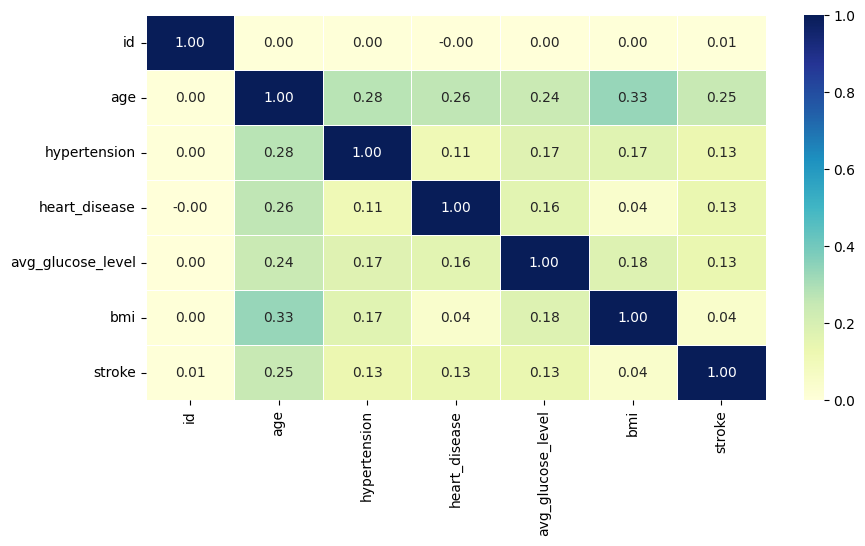

In [ ]:
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f", 
                 cmap="YlGnBu" 
                );

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


Replaces values in **gender** column

In [ ]:
df['gender'].replace("Male", 0, inplace=True)
df['gender'].replace("Female", 1, inplace=True)
df['gender'].replace("Other", 2, inplace=True)

Converts **gender** column data type from *object* to *int*

In [ ]:
df['gender'] = df['gender'].astype(int)

In [ ]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


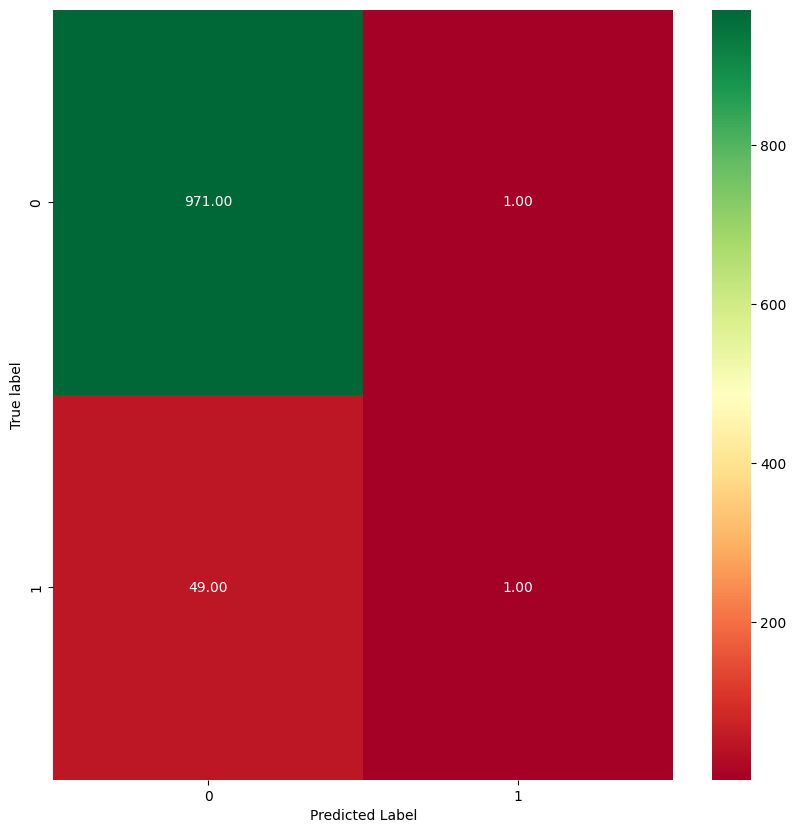

In [ ]:
plot_cm(y_test,y_pred)

## Building the Pipeline

Creates a column transformer that will MinMax scale the numerical variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

In [ ]:
num_attribs = ['hypertension','heart_disease']
cat_attribs = ['ever_married','work_type','Residence_type','smoking_status']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )

Creates a pipeline that will transform the data and then run an SVM Classification using the linear kernel.

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                     ])

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('num', MinMaxScaler(),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

## Executing the Model

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('num', MinMaxScaler(),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

## Evaluating Model

Runs the pipeline to predict **y** values and saves them into a variable called **y_pred**

In [ ]:
y_pred = pipeline.predict(X_test)

Calls the plot_cm function to generate the confusion matrix

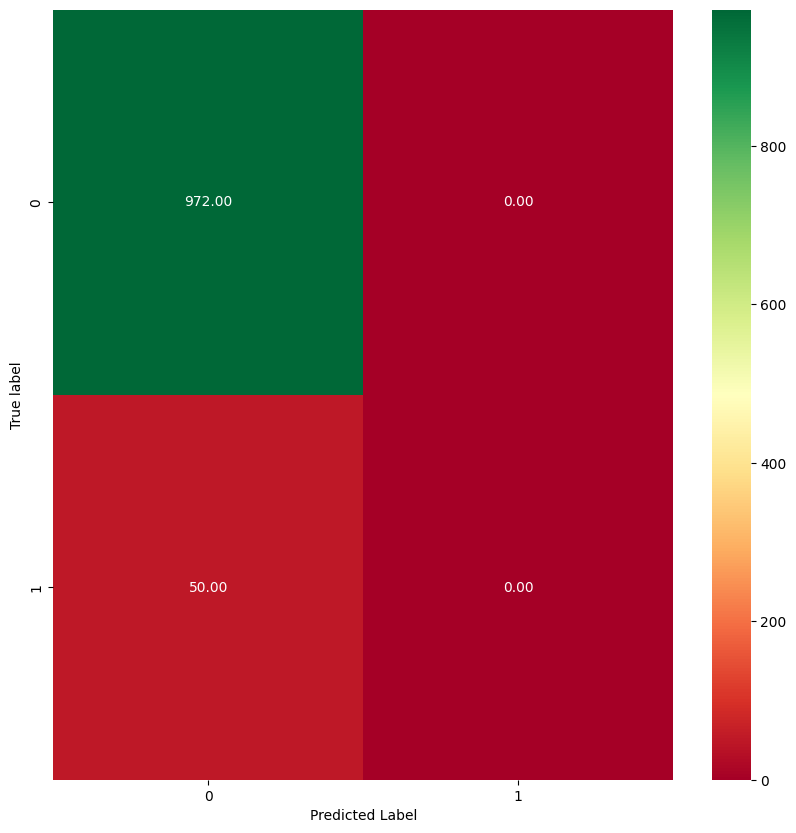

In [ ]:
plot_cm(y_test,y_pred)

Calculates the precision, recall, and F1 score

In [ ]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.0
0.0
0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusion
With Logistic Regression, (from other user examples) it appears that approx. 93% is the sweetspot. This allows the model room for improvement to routinely perform >95% in future updates.

# Decision Tree

## Reading the data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/stroke_data.csv')

## Splitting Data into Train/Test

Splits the data into Train/Test sets, and uses 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=24)

In [ ]:
num_attribs = ['id','hypertension','heart_disease']
cat_attribs = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
myDf = pd.get_dummies(X, columns=cat_attribs)

In [ ]:
X_train = pd.get_dummies(X_train, columns=cat_attribs)
X_test = pd.get_dummies(X_test, columns=cat_attribs)

In [ ]:
X_train.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1408,32826,6.0,0,0,87.74,17.7,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
3755,45472,22.0,0,0,138.55,24.0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3287,49753,34.0,0,0,81.54,31.8,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
4936,25982,24.0,0,0,91.21,28.1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3043,38243,37.0,0,0,101.07,26.4,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
print(len(X_train.columns))
print(len(X_test.columns))

22
21


Transforms the categorical variables before the train/test split

In [ ]:
transformed_X = pd.get_dummies(X, columns=cat_attribs)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=.20, random_state=32)

In [ ]:
print(len(X_train.columns))
print(len(X_test.columns))

22
22


Creates a column transformer that MinMax scales only the numerical variables

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                 ('num',MinMaxScaler(), num_attribs)],
                                  remainder='passthrough')

In [ ]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

## Executing the model

In [ ]:
df.drop("id",axis=1, inplace=True)

In [ ]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

ValueError: ignored

## Evaluating model

In [ ]:
y_pred = pipeline.predict(X_test)

NotFittedError: ignored

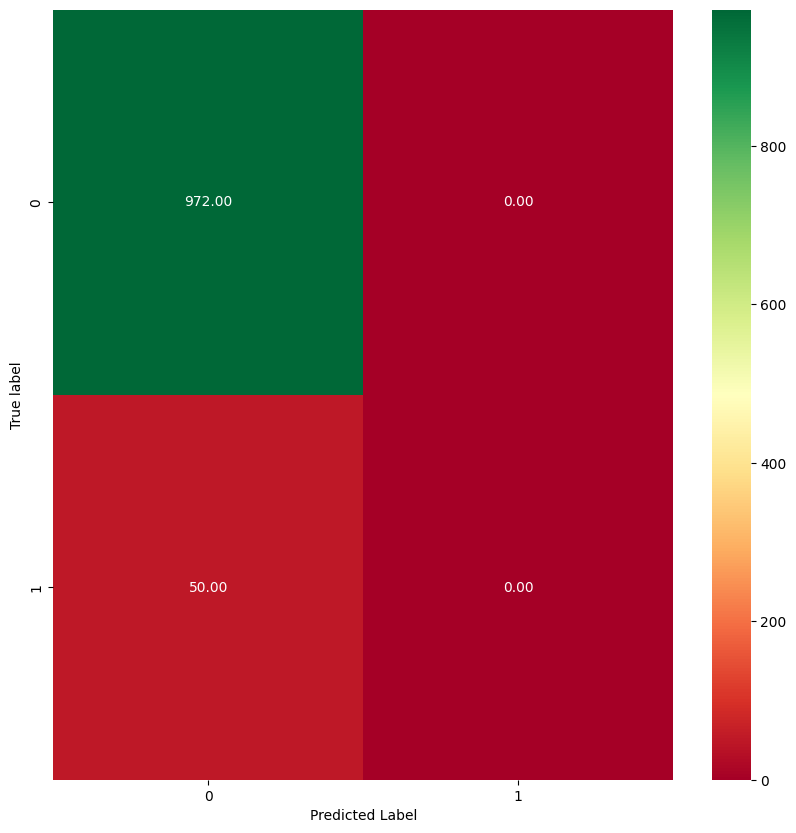

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("Precision: ", precision_score(y_test,y_pred))  
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(pipeline.named_steps.decision_tree, fontsize=14,impurity=False)

NotFittedError: ignored

<Figure size 5000x3000 with 0 Axes>

## Grid search pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'decision_tree__criterion':['gini','entropy'],'decision_tree__max_depth':[5,10,15,20]}

In [ ]:
grid_pipeline = GridSearchCV(pipeline, param_grid)

In [ ]:
grid_pipeline.fit(X_train, y_train)

ValueError: ignored

In [ ]:
grid_pipeline.best_params_

AttributeError: ignored

In [ ]:
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [ ]:
dt.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_pred = dt.predict(X_test)

ValueError: ignored

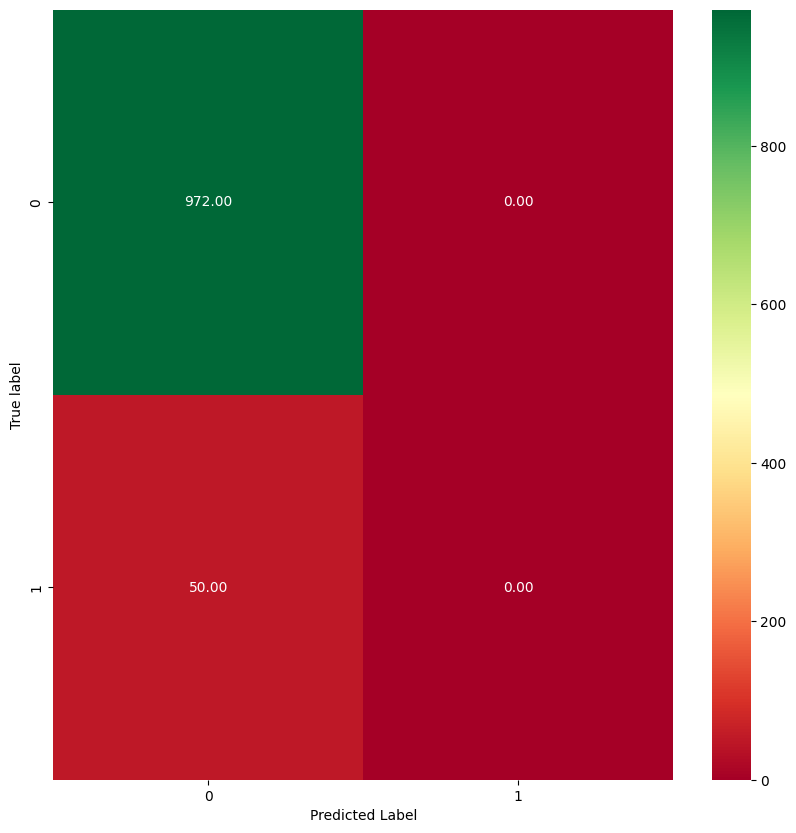

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("Precision: ", precision_score(y_test,y_pred))  
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusion
The Decision Tree algorithm allows the model to be run at approx. >96% (according to other user examples). This would suggest that in terms of accuracy in predictability, Decision Trees could be used to accurately diagnose the likelihood of having a stroke based on seemingly unrrelated life-decisions (smoking, marriage, etc.).
